In [1]:
def scatter_plot_r(x, 
                   y, 
                   title_label, 
                   x_label, 
                   y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          x: variavel independente
          y: variavel dependente
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    #Calcula o coef. de Correlação
    pearson = stats.pearsonr(x,y)[0]
    # Determina o estilo
    sns.set_style("whitegrid", {'grid.linestyle': ':'})
    # Determina o tamanho do gráfico.
    fig, ax = plt.subplots(figsize=(8,6))

    #plota o gráfico
    ax = sns.regplot(x=x,
                     y=y,
                     robust = False, # True: ignora os outliers,demora mais para calcular a regressão linear
                     scatter_kws={"color":'#5eaaa8',"alpha":0.2,"s":50},
                     line_kws={"color":'#eb5e0b',"alpha":0.9,"lw":1},
                     label="Coeficiente de Correlação = {0:.2f}".format(pearson))

    #local da legenda
    ax.legend(loc="best")
    #plota titulo
    ax.set_title(title_label, size = 20)
    #plota eixo x
    ax.set_xlabel(x_label, horizontalalignment='left', x=0, size = 16)
    #plota eixo y
    ax.set_ylabel(y_label,horizontalalignment='left', y=0, size = 16)
    #retira as linhas que delimitam o gráfico
    sns.despine(top=True, right=True, left=False, bottom=False)
    #seta o Zero como limite
    plt.ylim(ymin=0)  
    #Mostra o gráfico
    plt.show()

In [2]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats

In [3]:
#localização dos dados
path_input = r"C:\Users\MarceloPereiraMarcoP\Desktop\DataViz\house-prices-advanced-regression-techniques"
#link dos dados
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

#Carregando os dados
data = pd.read_csv(path_input + "/train.csv")

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df = data[[ 'LotFrontage', 'LotArea',
        'OverallQual', 'OverallCond', 'YearBuilt',  'GrLivArea', 'FullBath',
          'Fireplaces',  'GarageCars',  'SalePrice']]

In [7]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,FullBath,Fireplaces,GarageCars,SalePrice
0,65.0,8450,7,5,2003,1710,2,0,2,208500
1,80.0,9600,6,8,1976,1262,2,1,2,181500
2,68.0,11250,7,5,2001,1786,2,1,2,223500
3,60.0,9550,7,5,1915,1717,1,1,3,140000
4,84.0,14260,8,5,2000,2198,2,1,3,250000


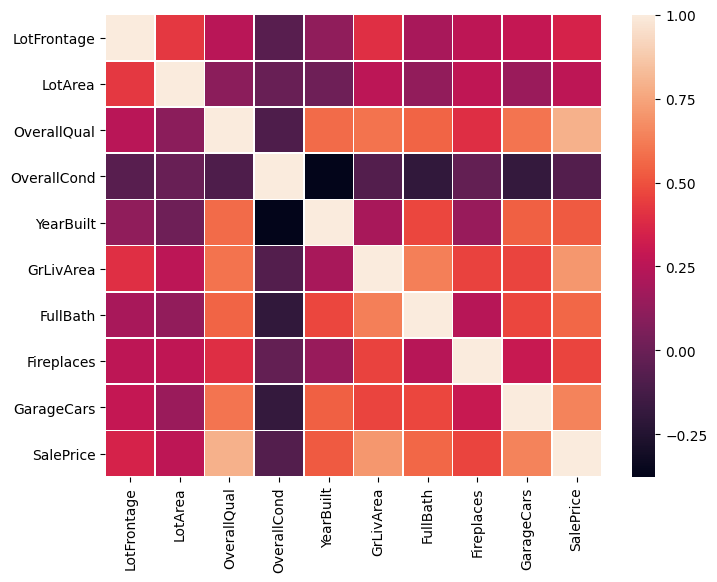

In [8]:
plt.rcdefaults()
f, ax = plt.subplots(figsize=(8, 6))
a = df.corr()
ax = sns.heatmap(a, linewidth=0.5)

<AxesSubplot:>

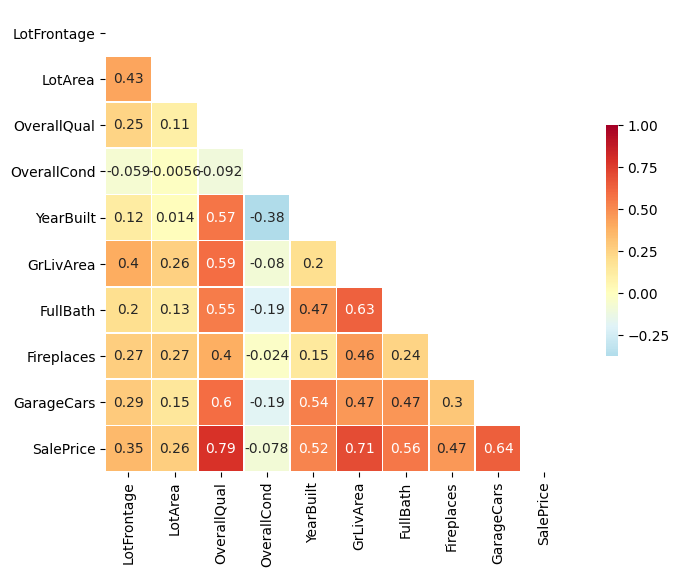

In [9]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))


sns.heatmap(corr, mask=mask, cmap='RdYlBu_r', vmax=1, center=0,annot=True,
            square=True, linewidths=.4, cbar_kws={"shrink": 0.5})

In [10]:
#lista de cmap
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'